# Deep Neural Networks course - assignment 1

### Michał Filipiuk 385423

#### Imports

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from src.data_loading import *
from src.network import U_net, training
from src.visualization import *

#### Loading configuration and data

In [18]:
config = load_config()
torch.cuda.set_device(config["DEVICE_NUMBER"])

In [19]:
train, validation, _ = load_dataset(config, validation_set_size = 0.1)

In [20]:
train_set_loader = build_set_loader(train, training=True)
validation_set_loader = build_set_loader(validation, training=False)

#### Building network

In [6]:
net = U_net().cuda()

#### Training

In [7]:
training(config, net, train_set_loader, validation_set_loader, number_of_epochs = 100)

Epoch 0
Epoch 0: Mean loss:1.1480708104269257
Epoch 0: Accuracy of the network:74.40063300668677%
Epoch 1
Epoch 1: Mean loss:0.8912946425121406
Epoch 1: Accuracy of the network:77.5482265681286%
Epoch 2
Epoch 2: Mean loss:0.8081385143015577
Epoch 2: Accuracy of the network:79.86585633555475%
Epoch 3
Epoch 3: Mean loss:0.7529627630251577
Epoch 3: Accuracy of the network:80.66265534942363%
Epoch 4
Epoch 4: Mean loss:0.7115528342453228
Epoch 4: Accuracy of the network:81.40291769154133%
Epoch 5
Epoch 5: Mean loss:0.6814394472059847
Epoch 5: Accuracy of the network:81.88250099204114%
Epoch 6
Epoch 6: Mean loss:0.6547084065775076
Epoch 6: Accuracy of the network:82.5245002504728%
Epoch 7
Epoch 7: Mean loss:0.6316212469647671
Epoch 7: Accuracy of the network:82.58311246932412%
Epoch 8
Epoch 8: Mean loss:0.6124576766086721
Epoch 8: Accuracy of the network:81.98764152416922%
Epoch 9
Epoch 9: Mean loss:0.5922247940867111
Epoch 9: Accuracy of the network:83.34015508206502%
Epoch 10
Epoch 10: Mea

#### Visualizing predictions

In [22]:
img = list(validation_set_loader)[0][0][0].cuda().view(1,3,256,256)

In [108]:
with torch.no_grad():
    o = net(img)

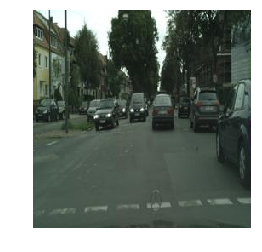

In [110]:
show_image(img[0].cpu().permute(1,2,0).long())

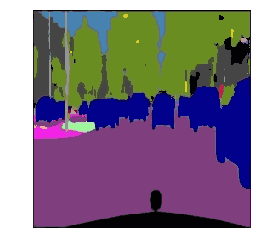

In [111]:
show_image(ids_to_rgb_image(o[0], id_to_colour_dict))

#### Loading model from file

In [23]:
model = torch.load("checkpoints/2019-05-08 10:40:05.509543_epoch_0")
model.eval()

U_net(
  (level_0): Conv_series(
    (bottom): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Dropout2d(p=0)
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace)
      (7): Dropout2d(p=0)
    )
  )
  (level_0_to_1): Down_step(
    (down): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): Conv_series(
        (bottom): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
          (3): Dropout2d(p=0)
          (4): Conv2d(128, 1

In [24]:
with torch.no_grad():
    o = model(img)

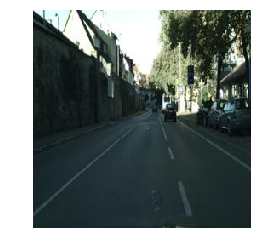

In [25]:
show_image(img[0].cpu().permute(1,2,0).long())

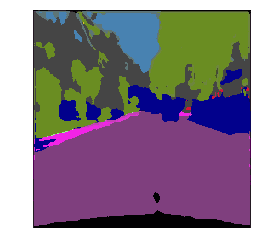

In [26]:
show_image(ids_to_rgb_image(o[0], id_to_colour_dict))